## Assignment 1 - ES98D

Consider the voter model in discrete time, $(\eta_n : n \in \mathbb{N}_0)$, on the state space $[0, 1]^{\Lambda}$ with $\Lambda = \{1, \ldots, L\}$ and transition rates:

$$ c(\eta, \eta_i) = \sum_{j \neq i} q(j, i) \left( \eta(i)(1 - \eta(j)) + \eta(j)(1 - \eta(i)) \right) $$
for all $i \in \Lambda$.

Recall that individual $j$ influences the opinion of individual $i$ with rate $q(j, i) \geq 0$. 

We use the standard notation
$$ \eta_i(k) = \begin{cases} \eta(k), & \text{if } k \neq i \\ 1 - \eta(k), & \text{if } k = i \end{cases} $$
for configurations where the opinion of individual \(i\) is flipped.

Assume a fully connected network, i.e., $q(j, i) = \lambda, \forall i, j \in \{1, \ldots, L\}$ for some constant $\lambda \in \mathbb{R}^+$.

At each timestep, the current state is $\eta_n$ and we select an individual $i$ according to
$$ p_i = \frac{c(\eta_n, \eta_i)}{\sum_{j=1}^{L} c(\eta_n, \eta_j)} $$
and update $\eta_{n+1} = \eta_{i}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

### 1. Gillespie Algorithm

Use Gillespie algorithm to simulate several realisations of the Volter model, with parameters: $L = 50, \lambda = 2/L$, and initial conditions such that 10 individuals have opinion 1 at time $n=0$.

The Gillespie algorithm consists of:
1. compute $c(\eta, \eta_{i})$ and sampling rate $R(\eta) = \Sigma_{i \in \Omega} c(\eta, \eta_{i})$
2. compute probability of changing i: $p(\eta, \eta_{i}) = \frac{c(\eta, \eta_{i})}{R(\eta)}$
3. update time, n = n+1
4. pick the state to change, with probability $p_{i}(\eta)$
5. update state i

In [2]:
def compute_c(lamda, eta):
    rates = np.zeros(len(eta))
    for i in range(0, len(eta)):
        rates[i] = (np.sum([lamda*(eta[i]*(1-eta[j]) + eta[j]*(1-eta[i])) for j in range(0, len(eta)) if i != j]))
    return rates
    
def gillespie(lamda, eta0, max_iterations, want_progress):
    i = 0
    eta_update = copy.deepcopy(eta0)
    eta_progress = []
    if want_progress:
        eta_progress.append(copy.deepcopy(eta_update))
    while i < max_iterations:
        if np.sum(eta_update) == 0 or np.sum(eta_update) == 50:
            break
        rates = compute_c(lamda, eta_update)
        R = np.sum(rates)
        prob = rates/R
        random_indx = np.random.choice(len(eta_update), p=prob)
        if eta_update[random_indx] == 1:
            eta_update[random_indx] = 0

        else:
            eta_update[random_indx] = 1
        i += 1
        if want_progress:
            eta_progress.append(copy.deepcopy(eta_update))

    return i, sum(eta_update), eta_progress
    

I shall first attempt to provide an effective visualisation for the progression of the algorithm.

<IPython.core.display.Javascript object>


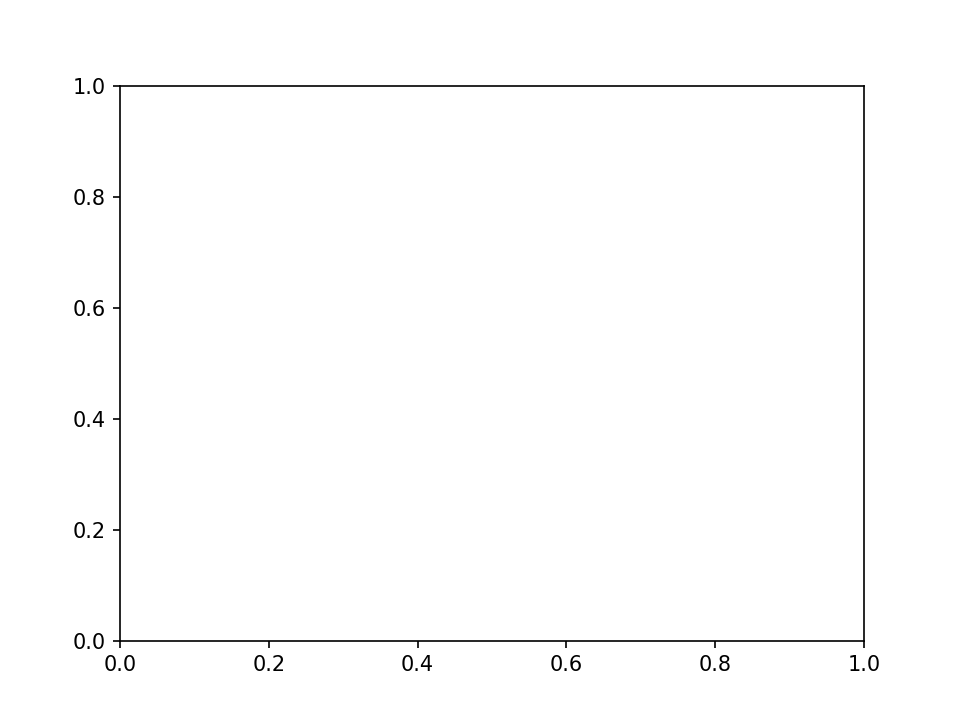

In [4]:
from matplotlib.animation import FuncAnimation

#model parameters
L = 50
lamda = 2/L

#creating initial population array
eta0 = np.zeros(L)

#as q(i, j) are equal can place the 1's anywhere within the population
eta0[:10] = 1


time, final_state, eta_progress = gillespie(lamda, eta0, 10000, want_progress = True)


#creating animated plot to show the progress of the of population
%matplotlib notebook

fig, ax = plt.subplots()

def update(frame):
    ax.clear()    
    ax.set_xlabel('Population')
    ax.set_ylabel('State')
    ax.set_title('Opinion Dynamics')
    line = ax.scatter(np.linspace(0, L, len(eta_progress[frame])), eta_progress[frame], marker='o', c = eta_progress[frame], cmap = 'winter')
    return line


ani = FuncAnimation(fig, update, frames=len(eta_progress), blit=True, interval=200, repeat=False)

The above shows an animated visualisation of one of the realisations of the Gillespie algorithm for the Volter model. We can see how agents in the population fluctuate between agree and disagree until a consensus is reached. I realise this is not very interesting in the PDF version of this document and also when all cells are run at once this will not work as it moves on as soon as the figure is generated, so has to be run by itself.

I shall now perform the simulation over numerous realisations to get accurate answers to the questions. Due to the interest of time I have only performed 50 iterations, and this still takes a noticeable length of time, however if more accuracy it required this can be increased at will.

In [9]:
no_realisations = 50 #this still takes a noticeable amount of time

time_array = []
final_state_array = []
for i in range(0, no_realisations):
    time, final_eta_state, _ = gillespie(lamda, eta0, 10000, want_progress = False)
    time_array.append(time)
    final_state_array.append(final_eta_state)
    


Use your simulations to find:
#### a)
Average number of timesteps require for everyone to have the same opinion.

In [10]:
average_time_steps = np.mean(time_array)
print(f"The average number of time steps before everyone has the same opinion (steady state is reached) is {average_time_steps:.2f}.")

The average number of time steps before everyone has the same opinion (steady state is reached) is 376.72.


#### b)
Average number of times each individual changes their opinion before agreement is reached

In [11]:
average_times_opinion_changed = average_time_steps/L
print(f"The average number of times an individual changes their opinion is {average_times_opinion_changed:.2f}")

The average number of times an individual changes their opinion is 7.53


#### c)
What is the proportion of cases that reach $\forall i = 1$ compared to $\forall i =0$. Does this match with expectations? How do you expect this proportion to change if you run more simulations?

In [12]:
all_ones = np.count_nonzero(np.array(final_state_array) == 50.0)
all_zeros = np.count_nonzero(np.array(final_state_array) == 0.0)

print(f"The proportion of cases that reach all values equal to: \n - 1 are {all_ones/no_realisations} \n - 0 are {all_zeros/no_realisations}.")

The proportion of cases that reach all values equal to: 
 - 1 are 0.24 
 - 0 are 0.76.


The above are for 50 simulations. The proportion of states that reaches all agents at state '1' is 0.24. This is similar to expectations as we start off with 10/50 agents in that state and so due to the equal rate, $\lambda$, and the fact that when all ones or all zeros is reached the system is in a steady state, we would expect a 10/50 chance of going to all ones and so 40/50 chance going to all zeros. As we run more and more simulations this value should get closer to the expected proportion.  

#### d)
$\textbf{Why did we chose $\lambda$ as a multiple of $\frac{1}{L}$?}$

A multiple of $\frac{1}{L}$ is chosen so that as the size of the population changes the proportion of people infected stays constant, meaning the system can deal with both large and small population sizes.

### 2. Counting Opinions
Define a new Markov process:

$$ N_n = \sum_{i=1}^{L} \eta_n(i) $$

which counts the number of individuals with opinion 1 at time $ n $. In each timestep, one individual will flip their opinion, and so $ N_n $ changes by 1.

#### a) 
From this observation, derive the following probabilities and justify why other possibilities have probability zero.

$$ P(N_{n+1} = k + 1 | N_n = k) = P(N_{n+1} = k - 1 | N_n = k) = \frac{\lambda^k(N - k)}{2\lambda^k(N - k)} = \frac{1}{2} $$

for $ k = 1, \ldots, L $

and the boundary conditions are:

$$ P(N_{n+1} = 0 | N_n = 0) = P(N_{n+1} = L | N_n = L) = 1. $$

The derivations can be seen within the supporting PDF document.

#### b)
$\textbf{What is the state space of the process $N_{n}$?}$

The state space of this process is $[0, 1, 2, ..... L-1, L]$

#### c)

Adapt the previous Gillespie algorithm to track $N_{n}$. What is the initial condition $N_{0}$?. Plot some realisations of the process aswell as their mean and variance. Comment on the appropriateness of these statistics and how they compare to expectations.

In [13]:
def adapted_Gillespie(eta0, lamda, max_iterations):
    i=0
    N_n = [np.sum(eta0), ]
    eta_update = copy.deepcopy(eta0)
    while i < max_iterations:
        if N_n[-1] == 0 or N_n[-1] == 50:
            break
        rates = compute_c(lamda, eta_update)
        R = np.sum(rates)
        prob = rates/R
        random_indx = np.random.choice(len(eta_update), p=prob)
        if eta_update[random_indx] == 1:
            eta_update[random_indx] = 0

        else:
            eta_update[random_indx] = 1
        N_n.append(np.sum(eta_update))
        i += 1
    return i, N_n
    

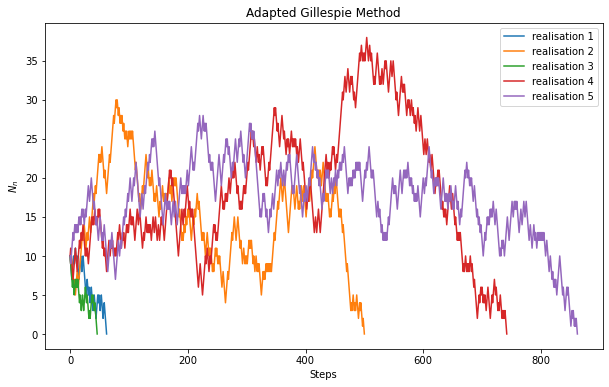

In [14]:
%matplotlib inline
fig, axes = plt.subplots(1, 1, figsize = (10, 6))


#plotting 5 random realisations
for i in range(0, 5):
    iterations, N_n = adapted_Gillespie(eta0, lamda, 10000)
    axes.plot(N_n, label = f'realisation {i+1}')
    
axes.set_title('Adapted Gillespie Method')
axes.set_xlabel('Steps')
axes.set_ylabel('$N_{n}$')
axes.legend()

        
plt.show()

The initial condition is that $N_{0} = 10$ and we can see that from the plot above that each realisation either ends up at $N_{n} = 0 \text{ or } N_{n} = 50$ within varying numbers of steps. 

I shall now run a number of realisations and plot how the mean and variance changes throughout the realisations. Here again I have used 50 iterations, again in a situation that required more accuracy, more iterations could be run but at the sacrifice of a greater time taken.

In [15]:
max_iter = 0
N_n_list = []
iterations_list = []
no_iters = 50
for i in range(0, no_iters):
    iterations, N_n = adapted_Gillespie(eta0, lamda, 10000)
    if iterations > max_iter:
        max_iter = iterations
    N_n_list.append(N_n)
    iterations_list.append(iterations)
    

In [16]:
#padding arrays with value of final state so that are are all the same length to allow calculations of mean and variance
N_pad_array = np.zeros((no_iters, max_iter+1))
for i, N_n in enumerate(N_n_list):
    if N_n[-1] == 50:
        N_pad_array[i] = np.pad(np.array(N_n), (0, np.abs(len(N_n)-1 - max_iter)), constant_values = 50)
    elif N_n[-1] == 0:
        N_pad_array[i] = np.pad(np.array(N_n), (0, np.abs(len(N_n)-1 - max_iter)), constant_values = 0)
        
mean = np.mean(N_pad_array, axis = 0)
std = np.std(N_pad_array, axis = 0)

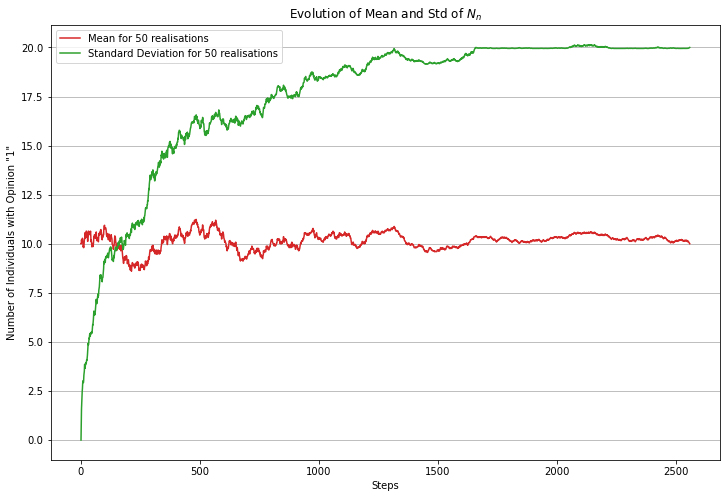

In [17]:
fig, ax1 = plt.subplots(1, 1, figsize = (12, 8))

ax1.plot(mean, color = 'tab:red', label = f'Mean for {no_iters} realisations')
ax1.plot(std, color = 'tab:green', label = f'Standard Deviation for {no_iters} realisations')
ax1.set_title(r'Evolution of Mean and Std of $N_{n}$')
ax1.set_ylabel('Number of Individuals with Opinion "1"')
ax1.set_xlabel('Steps')
ax1.legend()
plt.grid(axis = 'y')
plt.show()

The graph above shows that throughout the realisation, the mean at each step across all realisations has fluctuated around 10, this is expected as as more realisations reach the steady state we would expected the mean to converge to:
$0.8 * 0$ (probability they all go to zero times the sum of the population at all zeros) + $0.2 * 50$ (probability the all go to one times the sum of the population at all ones). This is equal to 10, explaining the behaviour seen by the mean in the graph above.

We can see also that the standard deviation has increased from zero (when all popoulations start in the same state) to a maximal value of around 20, this is explained as the populations reach steady states they will be spread further part with either all zeros or all ones so will have maximal variance. This can be calculated using a mean of 10 where when steady states are reached we either have all at ones or all at zeros so the variance is equivalent to $(50 - 10)^{2}*0.2$ + $(0 - 10)^{2}*0.8$ = 400 which when square rooted gives the standard deviation of 20 as seen above.

#### d)
As $N_{n}$ is itself a Markov chain, write a new algorithm to simulate $N_{n}$ only.

In [18]:
def MC(initial_N, max_iter):
    i = 0
    N_n = [initial_N, ]
    while i < max_iter:
        prob = 0.5
        rand_num = np.random.uniform(0, 1)
        if rand_num < prob:
            N_n.append(N_n[-1]+1)
        else: 
            N_n.append(N_n[-1]-1)
        if N_n[-1] == 0:
            break
        if N_n[-1] == 50:
            break
        i += 1
    return N_n

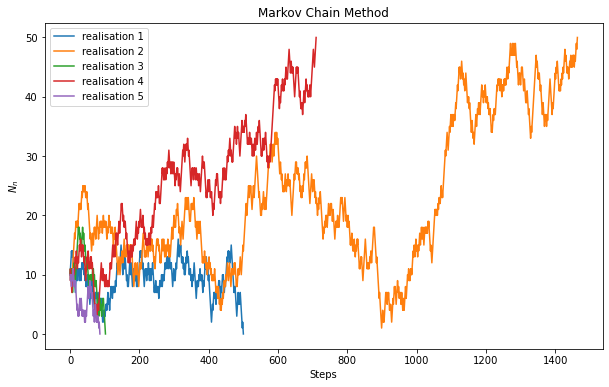

In [19]:
fig, axes = plt.subplots(1,1, figsize = (10, 6))


for i in range(5):
    N_n = MC(10, 5000)
    axes.plot(N_n, label = f'realisation {i+1}')
    
axes.set_xlabel('Steps')
axes.set_ylabel('$N_{n}$')
axes.set_title('Markov Chain Method')
axes.legend()

        

plt.show()

The Markov Chain method has produced realisations that look of a similar form to those seen from the adapted gillespie algorithm. They will be further compared below.

#### 2e)
Compare the two sets of simulations of $N_{n}$ from 2c) and 2d). Differences in terms of outcomes, computational speed? Which one is 'best'?

To begin the comparisson I shall produce similar plots as done for the Gillespie method of the mean and variances of the two methods.

In [46]:
max_iter = 0
N_n_list1 = []
no_iters = 100
for i in range(0, no_iters):
    N_n = MC(10, 5000)
    if len(N_n) > max_iter:
        max_iter = len(N_n)
    N_n_list1.append(N_n)
    

In [47]:
N_pad_array1 = np.zeros((no_iters, max_iter+1))
all_ones_count = 0
for i, N_n in enumerate(N_n_list1):
    if N_n[-1] == 50:
        N_pad_array1[i] = np.pad(np.array(N_n), (0, np.abs(len(N_n)-1 - max_iter)), constant_values = 50)
        all_ones_count += 1
    elif N_n[-1] == 0:
        N_pad_array1[i] = np.pad(np.array(N_n), (0, np.abs(len(N_n)-1 - max_iter)), constant_values = 0)
        
mean_MC = np.mean(N_pad_array1, axis = 0)
std_MC = np.std(N_pad_array1, axis = 0)

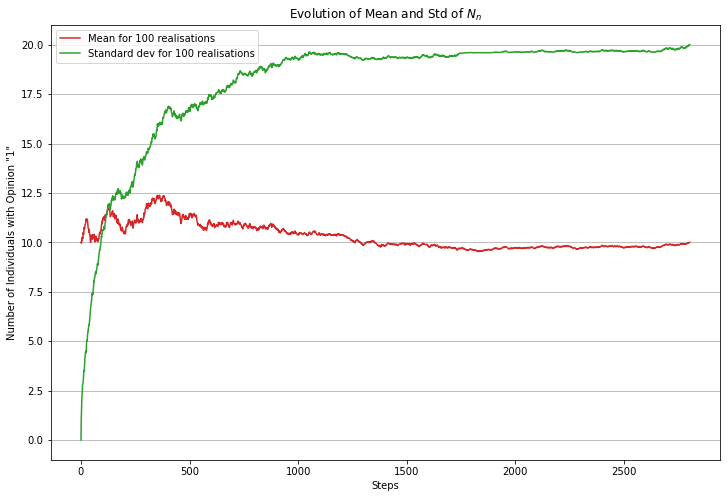

In [48]:
fig, ax1 = plt.subplots(1, 1, figsize = (12, 8))

ax1.plot(mean_MC, color = 'tab:red', label = f'Mean for {no_iters} realisations')
ax1.plot(std_MC, color = 'tab:green', label = f'Standard dev for {no_iters} realisations')
ax1.set_title(r'Evolution of Mean and Std of $N_{n}$')
ax1.set_ylabel('Number of Individuals with Opinion "1"')
ax1.set_xlabel('Steps')
ax1.legend()
plt.grid(axis = 'y')
plt.show()

The graph above shows that the Markov Chain has produced the same behaviour as previously seen, with the mean approaching 10 and the std approaching a maximal value at roughly 20. With the increased number of iterations performed here we can see the standard deviation does indeed plataeu at this value alot more clearly.

It is visibly apparent that the Markov Chain method is alot faster than the Gillespie algorithm, even with the increased number of iterations. And as the results have been similar this suggests that the Markov chain is the more efficient method to use. However, the benefit of the Gillespie algorithm is that it allows access to a lot more other information, not available within the Markov method. Therefor, the method should be chosen depending on what information is intending to be studied.

#### 2f)
Use the symmetry of the probability rates derived in 2a) to argue that $\mathbf{E}(N_{n})$ does not change with time.

Given the initial condition, what can you expect from the stationary distribution of the Markov chain, i.e. what are the proportions of simulations ending in all ones and all zeros. Does this match expectations and does it compare with 1c)

In [49]:
print(f"Proportion of MC simulations ending in all ones: {all_ones_count/no_iters}")
print(f"Proportion of MC simulations ending in all zeros: {(no_iters-all_ones_count)/no_iters}")

Proportion of MC simulations ending in all ones: 0.2
Proportion of MC simulations ending in all zeros: 0.8


As stated before the proportions should 1:4, this is exactly seen within the printed statements above from the Markov Chain method. The increased accuracy here compared to the values found from the Gillepsie algorithm could be due to the increased number of iterations allowed due to the increase computational speed of the Markov method.

E(N) doesnt change with time because there is an equal chance of the number increasing and decreasing at everystep, therefor on average the expected value will always stay the same.

### 3. Time to reach a steady state

Using the transition probabilities for $N_{n}$ given in section 2, derive the recursion relation for the expected number of steps before a steady state is reached ($N_{n} = 0$ or $N_{n} = L$). This gives a system of linear equations that can be solved for the parameters above ($L = 50, \lambda = \frac{2}{L}$). Solve this system, do results match with observations?.

As shown in supporting PDF, want to solve the system expressed by:
$$ \begin{bmatrix} 1 & 0 & 0 & 0 & \cdots & 0 \\ -0.5 & 1 & -0.5 & 0 & \cdots & 0 \\ 0 & -0.5 & 1 & -0.5 & \cdots & 0 \\ 0 & 0 & \ddots & \ddots & \ddots & 0 \\ 0 & \cdots & 0 & -0.5 & 1 & -0.5 \\ 0 & \cdots & 0 & 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} \tau_{0} \\ \tau_{1} \\ \tau_{2} \\ \vdots \\ \vdots \\ \tau_{L} \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \\ 1 \\ \vdots \\ 1 \\ 0 \end{bmatrix}$$   

for the $\tau$ array. 
To do this I will make use of np.linalg.solve to solve the linear equation.

In [50]:
#creating b column vector
b = np.ones(L+1)[:, None]
b[0] = 0
b[-1] = 0

#creating A matrix
A = np.diag(np.ones(L+1)) + np.diag(np.ones(L)*-0.5, k = 1) + np.diag(np.ones(L)*-0.5, k =-1)
A[0][0] = 1
A[0][1] = 0
A[-1][-1] = 1
A[-1][-2] = 0

#solving for tau column vector
tau = np.linalg.solve(A, b)

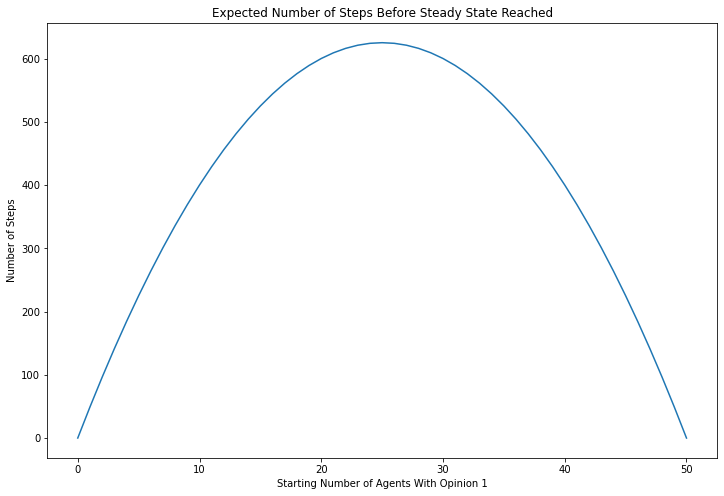

In [51]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

ax.set_title('Expected Number of Steps Before Steady State Reached')
ax.set_xlabel('Starting Number of Agents With Opinion 1')
ax.set_ylabel('Number of Steps')
ax.plot(tau)
plt.show()

Throughout this notebook we have used the initial starting conditions as $k = 10$ so want to investigate how the results for $\tau_{10}$ compare with previous observations.

In [52]:
iterations_list1 = []
for N_n in N_n_list1:
    iterations_list1.append(len(N_n))

mean_iter = np.mean(iterations_list)
mean_iter1 = np.mean(iterations_list1)

In [53]:
print(f"The expected number of steps to reach a steady state is {tau[10][0]:.1f}.")
print(f"The average number of steps taken for the adapted Gillespie algorithm is {mean_iter}.")
print(f"The average number of steps taken for the Markov Chain method is {mean_iter1}.")

The expected number of steps to reach a steady state is 400.0.
The average number of steps taken for the adapted Gillespie algorithm is 431.48.
The average number of steps taken for the Markov Chain method is 405.12.


We can see from the statements printed above that the observed values are similar to the calculated value, for both methods, these would converge closer to the calculated value with increasing number of iterations.